**Intro**

This notebook contains solutions to the exercises provided in the book "Bayesian Statistics the Fun Way" by Will Kurt. The solutions are in Python as opposed to R (like the official solutions).
For many exercises there are a couple of ways you can reach to solution depending on the packages you use (or if you even want to do it in pure Python).

I opted for **scipy.stats, numpy, itertools** and **seaborn**. I encourage you to try out other ways!

The solutions have been checked with the official solutions. There are however 1-2 instances were I think a mistake was made in the official solutions (see Chapter 7 Q3).

I would encourage you to try to find the solutions yourself first and then look them up here and in the official solutions.


I do not provide as much verbal explanations as the official solutions, because the author explains quite well and I think you should read his answers to the questions.

If you have any questions or find an error feel free to contact me or raise an issue in the github repo!

In [1]:
import itertools
import numpy as np
import seaborn as sns
from scipy.stats import beta, binom, norm

np.random.seed(13) #set random seed for all random processes
sns.set_style("whitegrid") #set style for seaborn

In [2]:
#small function for n over k by Andrew Dalke (found on StackOverflow)
def choose(n, k):
    """
    A fast way to calculate binomial coefficients by Andrew Dalke (contrib).
    """
    if 0 <= k <= n:
        ntok = 1
        ktok = 1
        for t in range(1, min(k, n - k) + 1):
            ntok *= n
            ktok *= t
            n -= 1
        return ntok // ktok
    else:
        return 0

# Chapter 1: 

**The exercises for Chapter one are best done with pen and paper I did not include them here.**

# Chapter 2: 

## Q1.
What is the probability of rolling two six-sided dice and getting a 
value greater than 7?

In [3]:
combinations = list(itertools.product(range(1,7),range(1,7))) 
#itertools.product returns the cartesian product of two iterables
combinations

[(1, 1),
 (1, 2),
 (1, 3),
 (1, 4),
 (1, 5),
 (1, 6),
 (2, 1),
 (2, 2),
 (2, 3),
 (2, 4),
 (2, 5),
 (2, 6),
 (3, 1),
 (3, 2),
 (3, 3),
 (3, 4),
 (3, 5),
 (3, 6),
 (4, 1),
 (4, 2),
 (4, 3),
 (4, 4),
 (4, 5),
 (4, 6),
 (5, 1),
 (5, 2),
 (5, 3),
 (5, 4),
 (5, 5),
 (5, 6),
 (6, 1),
 (6, 2),
 (6, 3),
 (6, 4),
 (6, 5),
 (6, 6)]

In [4]:
greater_7 = [sum(i) for i in combinations if sum(i) > 7]

In [5]:
print(f"Number of pairs with values greater than 7:  {len(greater_7)}")
print(f"Total number of pairs: {len(combinations)}")
print(f"P(>7)={round(len(greater_7)/len(combinations),2)}")

Number of pairs with values greater than 7:  15
Total number of pairs: 36
P(>7)=0.42


## Q2.
What is the probability of rolling three six-sided dice and getting a 
value greater than 7?

In [6]:
combinations_3dice = list(itertools.product(range(1,7),range(1,7),range(1,7)))
greater_7_3dice = [sum(i) for i in combinations_3dice if sum(i) > 7]

In [7]:
print(f"Number of pairs with values greater than 7:  {len(greater_7_3dice)}")
print(f"Total number of pairs: {len(combinations_3dice)}")
print(f"P(>7)={round(len(greater_7_3dice)/len(combinations_3dice),2)}")

Number of pairs with values greater than 7:  181
Total number of pairs: 216
P(>7)=0.84


## Q3.
The Yankees are playing the Red Sox. You’re a diehard Sox fan and 
bet your friend they’ll win the game. You’ll pay your friend 30 dollars if the Sox 
lose and your friend will have to pay you only 5 dollars if the Sox win. What is 
the probability you have intuitively assigned to the belief that the Red Sox 
will win?

In [8]:
odds_RSwin = 30/5
prob_RSwin = odds_RSwin/(1+odds_RSwin)
round(prob_RSwin,2)

0.86

# Chapter 3: The Logic of Uncertainty
## Q1. 
What is the probability of rolling a 20 three times in a row on a 
20-sided die?

In [9]:
(1/20)**3 # or (1/20)*(1/20)*(1/20)

0.00012500000000000003

## Q2. 
The weather report says there’s a 10 percent chance of rain tomorrow, 
and you forget your umbrella half the time you go out. What is the probability that you’ll be caught in the rain without an umbrella tomorrow?

In [10]:
p_rain = 0.1
p_umbrella = 0.5
p_rain*p_umbrella

0.05

## Q3. 
Raw eggs have a 1/20,000 probability of having salmonella. If you eat 
two raw eggs, what is the probability you ate a raw egg with salmonella?

In [11]:
1/20000 + 1/20000 #given that they are independent

0.0001

In [12]:
round(1/20000 + 1/20000 - 1/20000 * (1/20000),5) #more formally correct

0.0001

## Q4. 
What is the probability of either flipping two heads in two coin tosses 
or rolling three 6s in three six-sided dice rolls?

In [13]:
p_two_heads = 0.5 * 0.5
p_three_six = (1/6)*(1/6)*(1/6)
p_either_event = p_two_heads + p_three_six
round(p_either_event,2)

0.25

# Chapter 4: Creating a Binomial Probability Distribution
## Q1. 
What are the parameters of the binomial distribution for the probability of rolling either a 1 or a 20 on a 20-sided die, if we roll the die 
12 times?

In [14]:
p = 1/20 + 1/20 #prob of either 1 or 20
k = 1 #looking for event to occur once
n = 12 # 12 trials

## Q2. 
There are four aces in a deck of 52 cards. If you pull a card, return 
the card, then reshuffle and pull a card again, how many ways can you pull 
just one ace in five pulls?

In [15]:
choose(5,1)

5

## Q3. 
For the example in question 2, what is the probability of pulling five 
aces in 10 pulls (remember the card is shuffled back in the deck when it is 
pulled)?

In [16]:
k = 5
n = 10
p = 4/52
binom.pmf(k,n,p)

0.0004548552879040868

## Q4. 
When you’re searching for a new job, it’s always helpful to have more 
than one offer on the table so you can use it in negotiations. If you have a 
1/5 probability of receiving a job offer when you interview, and you interview with seven companies in a month, what is the probability you’ll have 
at least two competing offers by the end of that month?

In [17]:
p_offer = 1/5
n = 7
p_two_or_more_7 = binom.cdf(7,n,p_offer)-binom.cdf(1,n,p_offer) #prob from 2 offers to 7 offers
p_two_or_more_7

0.42328319999999986

## Q5. 
You get a bunch of recruiter emails and find out you have 25 interviews lined up in the next month. Unfortunately, you know this will leave 
you exhausted, and the probability of getting an offer will drop to 1/10 
if you’re tired. You really don’t want to go on this many interviews unless 
you are at least twice as likely to get at least two competing offers. Are you 
more likely to get at least two offers if you go for 25 interviews, or stick to 
just 7?

In [18]:
n_interview = 25
p_offer_tired = 1/10
p_two_or_more_25 = binom.cdf(7,n_interview,p_offer_tired)-binom.cdf(1,n_interview,p_offer_tired)
p_two_or_more_25

0.7265327819658538

In [19]:
p_two_or_more_25/p_two_or_more_7

1.7164224376631392

Only 1.7 times more likely to get an offer not twice.

# Chapter 5: The Beta Distribution
## Q1. 
You want to use the beta distribution to determine whether or not a
coin you have is a fair coin—meaning that the coin gives you heads and
tails equally. You flip the coin 10 times and get 4 heads and 6 tails. Using
the beta distribution, what is the probability that the coin will land on
heads more than 60 percent of the time?

In [20]:
betacdf = beta(4,6).cdf

betacdf(1.0) - betacdf(0.6)

0.09935257600000003

## Q2. 
You flip the coin 10 more times and now have 9 heads and 11 tails
total. What is the probability that the coin is fair, using our definition of
fair, give or take 5 percent?

In [21]:
betacdf = beta(9,11).cdf

betacdf(0.55) - betacdf(0.45)

0.3098800156513042

## Q3. 
Data is the best way to become more confident in your assertions. You
flip the coin 200 more times and end up with 109 heads and 111 tails. Now
what is the probability that the coin is fair, give or take 5 percent?

In [22]:
betacdf = beta(109,111).cdf

betacdf(0.55) - betacdf(0.45)

0.8589371426532354

# Chapter 6: Conditional Probability
## Q1. 
What piece of information would we need in order to use Bayes’
theorem to determine the probability that someone in 2010 who had GBS
also had the flu vaccine that year?

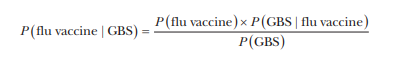

## Q2. 
What is the probability that a random person picked from the
population is female and is not color blind?

In [23]:
p_female = 0.5
p_colorblind_given_f = 0.005
p_notcolorblind_female = p_female*(1-p_colorblind_given_f)
p_notcolorblind_female

0.4975

## Q3. 
What is the probability that a male who received the flu vaccine in
2010 is either color blind or has GBS?

In [24]:
p_GBS_given_fvac = 3/100000
p_colorblind_given_m = 0.08
p_male = 0.5
p_male_and_colorblind = p_colorblind_given_m * p_male #gives 0.04 not 0.004 as described in book solutions.

p_male_and_colorblind + p_GBS_given_fvac - p_male_and_colorblind * p_GBS_given_fvac

0.0400288

# Chapter 7: Bayes' Theorem with LEGO

## Q1.
Kansas City, despite its name, sits on the border of two US states: 
Missouri and Kansas. The Kansas City metropolitan area consists of 
15 counties, 9 in Missouri and 6 in Kansas. The entire state of Kansas has 
105 counties and Missouri has 114. Use Bayes’ theorem to calculate the 
probability that a relative who just moved to a county in the Kansas City 
metropolitan area also lives in a county in Kansas. Make sure to show 
P(Kansas) (assuming your relative lives either in Kansas or Missouri), 
P(Kansas City metropolitan area), and P(Kansas City metropolitan area | 
Kansas).

In [25]:
kansas_counties = 105
missouri_counties = 114
p_kc_kansas = 6/105
p_kc_missouri = 9/114
total_counties = kansas_counties + missouri_counties

p_kansas_kc = (p_kc_kansas*(kansas_counties/total_counties))/(15/total_counties)
p_kansas_kc

0.4

## Q2
A deck of cards has 52 cards with suits that are either red or black. 
There are four aces in a deck of cards: two red and two black. You remove a red ace from the deck and shuffle the cards. Your friend pulls a black card. What is the probability that it is an ace?

In [26]:
p_ace_black_1 = 2/26 # = 1/13;already the answer will use bayes theorem however

p_ace = 3/51
p_black_ace = 2/3 #p(black card given ace)
p_black = 26/51


p_ace_black_2 = (p_black_ace*p_ace)/p_black

print(p_ace_black_1 == p_ace_black_2)
print(p_ace_black_2)

True
0.07692307692307693


# Chapter 8:The Prior, Likelihood, and Posterior of Bayes’ Theorem
## Q1. 
As mentioned, you might disagree with the our original probability 
assigned to the likelihood: 

P(broken window, open front door, missing laptop | robbed) = 3/10

How much does this change our strength in believing H1 over H2?

In [69]:
((1/(1000))*(3/100))/(1/21900000) #update 3/10 to 3/100

657.0

## Q2. 
How unlikely would you have to believe being robbed is—our prior 
for H1—in order for the ratio of H1 to H2 to be even?

In [27]:
((1/(1000*6570))*(3/10))/(1/21900000) # for P(D|H1)=3/10 (value before Q1)

1.0

In [28]:
((1/(1000*657))*(3/100))/(1/21900000)# for P(D|H1)=3/100 (value after Q1)

1.0

# Chapter 9: Bayesian Priors and Working with Probability Distributions
## Q1. 
A friend finds a coin on the ground, flips it, and gets six heads in a 
row and then one tails. Give the beta distribution that describes this. 
Use integration to determine the probability that the true rate of flipping 
heads is between 0.4 and 0.6, reflecting that the coin is reasonably fair.

In [29]:
beta_coin = beta(6,1).cdf
round((beta_coin(0.6)-beta_coin(0.4)),5)

0.04256

## Q2. 
Come up with a prior probability that the coin is fair. Use a beta 
distribution such that there is at least a 95 percent chance that the true 
rate of flipping heads is between 0.4 and 0.6.

In [30]:
fair_prior = 55 # 55 gives around 95%, 100 gives over 99%
beta_fair = beta(6+fair_prior,1+fair_prior).cdf
round((beta_fair(0.6)-beta_fair(0.4)),5)

0.95275

## Q3. 
Now see how many more heads (with no more tails) it would take to 
convince you that there is a reasonable chance that the coin is not fair. In 
this case, let’s say that this means that our belief in the rate of the coin 
being between 0.4 and 0.6 drops below 0.5.

In [31]:
add_head = range(0,30,5)
for i in add_head:
    beta_notfair = beta(6+fair_prior+i,1+fair_prior).cdf
    print(f"Additional heads: {i} ; belief in rate between 0.4 and 0.6: {round((beta_notfair(0.6)-beta_notfair(0.4)),5)}")

Additional heads: 0 ; belief in rate between 0.4 and 0.6: 0.95275
Additional heads: 5 ; belief in rate between 0.4 and 0.6: 0.90469
Additional heads: 10 ; belief in rate between 0.4 and 0.6: 0.8232
Additional heads: 15 ; belief in rate between 0.4 and 0.6: 0.71113
Additional heads: 20 ; belief in rate between 0.4 and 0.6: 0.5785
Additional heads: 25 ; belief in rate between 0.4 and 0.6: 0.44077


# Chapter 10: Introduction to Averaging and Parameter Estimation
## Q1. 
It’s possible to get errors that don’t quite cancel out the way we want. 
In the Fahrenheit temperature scale, 98.6 degrees is the normal body temperature and 100.4 degrees is the typical threshold for a fever. Say you are taking care of a child that feels warm and seems sick, but you take 
repeated readings from the thermometer and they all read between 99.5 
and 100.0 degrees: warm, but not quite a fever. You try the thermometer 
yourself and get several readings between 97.5 and 98. What could be 
wrong with the thermometer?

**Answer: The thermometer seems to measure incorrectly. It seems to measure about 1°F below the actual temperature.**

## Q2. 
Given that you feel healthy and have traditionally had a very consistently normal temperature, how could you alter the measurements 100, 99.5, 99.6, and 100.2 to estimate if the child has a fever?

**Answer: Add 1°F in accordance with the biased measurement to attain the actual temperature. This results in 101,100.5,100.6,101.2 which all lie above the 100.4 fever threshold.**

# Chapter 11: Measuring the Spread of Our Data
## Q1. 
One of the benefits of variance is that squaring the differences makes 
the penalties exponential. Give some examples of when this would be a 
useful property.

Whenever we have strong outliers (very small or very large values) that are important to our observations/data this property is useful. E.g. if we want to penalize the lateness of a student it might not make much of a difference if the student is 2minutes late, if she however is 200mins late she missed the whole class which is far worse.

## Q2. 
Calculate the mean, variance, and standard deviation for the 
following values: 1, 2, 3, 4, 5, 6, 7, 8, 9, 10.

In [32]:
#calculations from scratch without the explicit numpy functions to show the formulas
def scratch_mean(x)->float:
    return sum(x)/len(x)
def scratch_var(x)->float:
    return sum([(i-scratch_mean(x))**2 for i in x])/len(x)
def scratch_sd(x)->float:
    return np.sqrt(scratch_var(x))

In [33]:
q2_values = [1,2,3,4,5,6,7,8,9,10]

print(f"Mean: {scratch_mean(q2_values)}")
print(f"Variance: {scratch_var(q2_values)}")
print(f"SD: {scratch_sd(q2_values)}")

Mean: 5.5
Variance: 8.25
SD: 2.8722813232690143


# Chapter 12: The Normal Distribution
## Q1.
What is the probability of observing a value five sigma greater than the mean or more?

In [34]:
norm_dist = norm(0,1).cdf #normal dist with mean 0 and sd = 1
norm_dist(100)-norm_dist(5) #prob density between 5(5 sigma from mean) and a large number (e.g. 100)

2.866515719235352e-07

## Q2. 
A fever is any temperature greater than 100.4 degrees Fahrenheit. 
Given the following measurements, what is the probability that the patient 
has a fever?

100.0, 99.8, 101.0, 100.5, 99.7

In [35]:
temperatures = [100.0, 99.8, 101.0, 100.5, 99.7]

mean_temp = np.mean(temperatures)
sd_temp = np.std(temperatures)

mean_temp,sd_temp

(100.2, 0.4857983120596447)

In [36]:
norm_fever = norm(mean_temp,sd_temp).cdf
norm_fever(200) - norm_fever(100.4)

0.3402820504876537

## Q3. 
Suppose in Chapter 11 we tried to measure the depth of a well by timing coin drops and got the following values:

2.5, 3, 3.5, 4, 2

The distance an object falls can be calculated (in meters) with the following formula:

distance = 1/2 × G × time²

where G is 9.8 m/s/s. 

What is the probability that the well is over 500 
meters deep?

In [37]:
drop_times = [2.5, 3, 3.5, 4, 2]
mean_drop_times = np.mean(drop_times)
sd_drop_times = np.std(drop_times)
mean_drop_times,sd_drop_times

(3.0, 0.7071067811865476)

We need to solve:

1/2 x G x t² =500

If G is 9.8, we can work out that time (t) is about 10.10 seconds.

In [38]:
norm_drop = norm(mean_drop_times,sd_drop_times).cdf

norm_drop(100)-norm_drop(10.1)

0.0

## Q4. 
What is the probability there is no well (i.e., the well is really 0 meters 
deep)? You’ll notice that probability is higher than you might expect, given 
your observation that there is a well. There are two good explanations for 
this probability being higher than it should. The first is that the normal distribution is a poor model for our measurements; the second is that, when making up numbers for an example, I chose values that you likely wouldn’t see in real life. Which is more likely to you?

In [39]:
round(norm_drop(0),5)

1e-05

It’s small, but the probability that there is no well is greater than 1 
in 100,000. But the well is right in front of you! So, even 
if the probability is small, it’s not really that close to zero. Now should 
we question the model, or should we question the data? 

As a Bayesian, 
generally you should favor questioning the model over the data. For 
example, movement in stock prices will typically have very high σ events 
during financial crises. This means that the normal distribution is a 
bad model for stock movements. However, in this example, there’s no 
reason to question the assumptions of the normal distribution, and in 
fact these are the original numbers that I picked for the previous chap-
ter until my editor pointed out that the values seemed too spread out.
One of the greatest virtues in statistical analysis is skepticism. In 
practice I have been given bad data to work with on a few occasions. 
Even though models are always imperfect, it’s very important to make 
sure that you can trust your data as well. See if the assumptions you 
have about the world hold up and, if they don’t, see if you can be con-
vinced that you still trust your model and your data.

# Chapter 13: Tools of Parameter Estimation: The PDF, CDF, and Quantile Function
## Q1. 
Using the code example for plotting the PDF on page 127, plot the 
CDF and quantile functions.

### CDF

<AxesSubplot:>

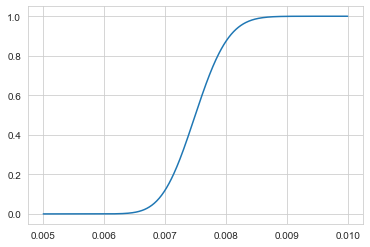

In [61]:
x = np.arange(0.005,0.01,0.00001)
beta_cdf_x = beta.cdf(x,300,40000-300)
sns.lineplot(x=x,y=beta_cdf_x)


### Quantile

<AxesSubplot:>

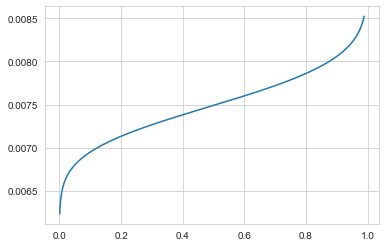

In [62]:
x = np.arange(0.001,0.99,0.001)
beta_quant_x = beta.ppf(x,300,39700)
sns.lineplot(x=x,y=beta_quant_x)

## Q2. 
Returning to the task of measuring snowfall from Chapter 10, say you 
have the following measurements (in inches) of snowfall: 

7.8, 9.4, 10.0, 7.9, 9.4, 7.0, 7.0, 7.1, 8.9, 7.4

What is your 99.9 percent confidence interval for the true value of 
snowfall?

In [41]:
snowfall = [7.8, 9.4, 10.0, 7.9, 9.4, 7.0, 7.0, 7.1, 8.9, 7.4]
mean_snowfall = np.mean(snowfall)
sd_snowfall = np.std(snowfall)

norm_snow = norm.interval(0.999,loc = mean_snowfall,scale = sd_snowfall)
norm_snow

(4.64767499582816, 11.732325004171877)

## Q3. 
A child is going door to door selling candy bars. So far she has visited 
30 houses and sold 10 candy bars. She will visit 40 more houses today. 
What is the 95 percent confidence interval for how many candy bars she 
will sell the rest of the day?

In [42]:
beta_candysold = beta.interval(0.95,10,20)
beta_candysold #95% CI for prob of selling a candybar

(0.17938364923511183, 0.50832335380999)

In [43]:
print(f"Lower bound: {beta_candysold[0]*40} \nUpper bound: {beta_candysold[1]*40}")

Lower bound: 7.175345969404473 
Upper bound: 20.332934152399602


# Chapter 14: Parameter Estimation with Prior Probabilities
## Q1. 

Suppose you’re playing air hockey with some friends and flip a coin 
to see who starts with the puck. After playing 12 times, you realize that 
the friend who brings the coin almost always seems to go first: 9 out of 
12 times. Some of your other friends start to get suspicious. Define prior 
probability distributions for the following beliefs:

- One person who weakly believes that the friend is cheating and the true rate of coming up heads is closer to 70 percent.
- One person who very strongly trusts that the coin is fair and provided a 50 percent chance of coming up heads.
- One person who strongly believes the coin is biased to come up heads 70 percent of the time.

In [44]:
data = beta(9,3)
weak_70perc = beta(7,3)
verystrong_fair = beta(100,100)
strong_70perc = beta(70,30)

## Q2. 
To test the coin, you flip it 20 more times and get 9 heads and 11 tails. 
Using the priors you calculated in the previous question, what are the 
updated posterior beliefs in the true rate of flipping a heads in terms of 
the 95 percent confidence interval?

In [45]:
data_new = beta(9+9,11+3)

post_weak_70perc = beta(18+7,14+3)
post_verystrong_fair = beta(18+100,14+100)
post_strong_70perc = beta(18+70,14+30)

In [46]:
print(post_weak_70perc.interval(0.95))
print(post_verystrong_fair.interval(0.95))
print(post_strong_70perc.interval(0.95))

(0.44504782337068916, 0.7368320053113375)
(0.44441787655828846, 0.5726826916062475)
(0.5843152658326919, 0.7442339112415737)


# Chapter 15: From Parameter Estimation to Hypothesis Testing:  Building a Bayesian A/B Test

## Q1. 
Suppose a director of marketing with many years of experience tells 
you he believes very strongly that the variant without images (B) won’t 
perform any differently than the original variant. How could you account 
for this in our model? Implement this change and see how your final 
conclusions change as well.

In [47]:
#increase the prior (original beta(3,7))
prior_alpha = 300
prior_beta = 700
n_trials = 10000

var_a_samples = np.random.beta(36+prior_alpha,114+prior_beta,size=n_trials)
var_b_samples = np.random.beta(50+prior_alpha,100+prior_beta,size=n_trials)
p_b_superior = sum(var_b_samples>var_a_samples)/n_trials

In [48]:
p_b_superior #before it was 0.96

0.7403

## Q2. 
The lead designer sees your results and insists that there’s no way that 
variant B should perform better with no images. She feels that you should 
assume the conversion rate for variant B is closer to 20 percent than 
30 percent. Implement a solution for this and again review the results of 
our analysis.

In [49]:
prior_b_alpha = 20
prior_b_beta = 80
prior_a_alpha = 30
prior_a_beta = 70

var_a_samples = np.random.beta(36+prior_a_alpha,114+prior_a_beta,size=n_trials)
var_b_samples = np.random.beta(50+prior_b_alpha,100+prior_b_beta,size=n_trials)
p_b_superior = sum(var_b_samples>var_a_samples)/n_trials

In [50]:
sum(var_b_samples>var_a_samples)

6540

In [51]:
p_b_superior

0.654

## Q3. 
Assume that being 95 percent certain means that you’re more or less 
“convinced” of a hypothesis. Also assume that there’s no longer any limit 
to the number of emails you can send in your test. If the true conversion 
for A is 0.25 and for B is 0.3, explore how many samples it would take to 
convince the director of marketing that B was in fact superior. Explore 
the same for the lead designer.

In [67]:
def draw_results(n_samples, rate):
    results = []
    for i in range(int(n_samples/2)):
        draw = np.random.rand()
        results.append(draw)
    results = np.array(results)
    a = sum(results <= rate)
    b = sum(results > rate)
    return a, b

In [68]:
#for the director of marketing
a_true_rate = 0.25
b_true_rate = 0.3

p_b_sup = 0
n_samples = 0
n_trials = 100000
while p_b_sup < 0.95:
    n_samples += 100
    a_samples_a, a_samples_b = draw_results(n_samples, a_true_rate)
    b_samples_a, b_samples_b = draw_results(n_samples, b_true_rate)
    a_samples = beta.rvs(a_samples_a + prior_alpha, a_samples_b + prior_beta, size=n_trials)
    b_samples = beta.rvs(b_samples_a + prior_alpha, b_samples_b + prior_beta, size=n_trials)
    p_b_sup = sum(b_samples > a_samples)/n_trials
    print(n_samples)


100
200
300
400
500
600
700
800
900
1000
1100
1200
1300


In [54]:
#for the director of marketing
a_true_rate = 0.25
b_true_rate = 0.3

p_b_sup = 0
n_samples = 0
n_trials = 100000
while p_b_sup < 0.95:
    n_samples += 100
    a_samples_a, a_samples_b = draw_results(n_samples, a_true_rate)
    b_samples_a, b_samples_b = draw_results(n_samples, b_true_rate)
    a_samples = beta.rvs(a_samples_a + prior_a_alpha, a_samples_b + prior_a_beta, size=n_trials)
    b_samples = beta.rvs(b_samples_a + prior_b_alpha, b_samples_b + prior_b_beta, size=n_trials)
    p_b_sup = sum(b_samples > a_samples)/n_trials
    print(n_samples)

100
200
300
400
500
600
700
800
900
1000


# Chapter 16: Introduction to the Bayes Factor and Posterior Odds:  The Competition of Ideas

## Q1. 
Returning to the dice problem, assume that your friend made a 
mistake and suddenly realized that there were, in fact, two loaded dice 
and only one fair die. How does this change the prior, and therefore the 
posterior odds, for our problem? Are you more willing to believe that the 
die being rolled is the loaded die?

In [70]:
prior_odds = (2/3)/(1/3)
posterior_odds = prior_odds*3.77
posterior_odds

7.54

## Q2. 
Returning to the rare diseases example, suppose you go to the doctor, 
and after having your ears cleaned you notice that your symptoms persist. 
Even worse, you have a new symptom: vertigo. The doctor proposes another possible explanation, labyrinthitis, which is a viral infection of the 
inner ear in which 98 percent of cases involve vertigo. However, hearing 
loss and tinnitus are less common in this disease; hearing loss occurs only 
30 percent of the time, and tinnitus occurs only 28 percent of the time. 
Vertigo is also a possible symptom of vestibular schwannoma, but occurs 
in only 49 percent of cases. In the general population, 35 people per million contract labyrinthitis annually. What is the posterior odds when you 
compare the hypothesis that you have labyrinthitis against the hypothesis that you have vestibular schwannoma?

*Note: the official solutions have an error here. The wrong probabilities are used for the symptoms of vestibular schwannanoma. (0.64*0.55*0.49) The first two are the probabilites for the symptoms in case of earwax.*

In [82]:
p_lab = 35/1000000
p_ves = 11/1000000

# p_vertigo_lab = 0.98
# p_hearingloss_lab = 0.30
# p_tinnitus_lab = 0.28
# p_vertigo_ves = 0.49
# p_hearingloss_ves = 0.94
# p_tinnitus_ves = 0.83

p_symptoms_lab = 0.98*0.30*0.28
p_symptoms_ves = 0.49*0.94*0.83


prior_odds = p_symptoms_lab/p_symptoms_ves
posterior_odds = prior_odds*(p_lab/p_ves)
posterior_odds

0.6851390086458019

# Chapter 17: Bayesian Reasoning in the Twilight Zone
## Q1. 
Every time you and your friend get together to watch movies, you flip 
a coin to determine who gets to choose the movie. Your friend always 
picks heads, and every Friday for 10 weeks, the coin lands on heads. You 
develop a hypothesis that the coin has two heads sides, rather than both 
a heads side and a tails side. Set up a Bayes factor for the hypothesis that 
the coin is a trick coin over the hypothesis that the coin is fair. What does 
this ratio alone suggest about whether or not your friend is cheating you?

In [84]:
H_2heads = 1
H_headstails = 0.5**10
bayes_factor = H_2heads/H_headstails
bayes_factor

1024.0

Already looks like there is a high probability that the friend is cheating.

## Q2. 
Now imagine three cases: that your friend is a bit of a prankster, that 
your friend is honest most of the time but can occasionally be sneaky, and 
that your friend is very trustworthy. In each case, estimate some prior 
odds ratios for your hypothesis and compute the posterior odds.

In [86]:
prior_prankster = 5/1
prior_mostlyhonest = 1/10
prior_trustworthy = 1/1000

print(f"Prankster Posterior: {prior_prankster*bayes_factor}")
print(f"Mostly Honest Posterior: {prior_mostlyhonest*bayes_factor}")
print(f"Trustworthy Posterior: {prior_trustworthy*bayes_factor}")

Prankster Posterior: 5120.0
Mostly Honest Posterior: 102.4
Trustworthy Posterior: 1.024


## Q3. 
Suppose you trust this friend deeply. Make the prior odds of them 
cheating 1/10,000. 
How many times would the coin have to land on heads 
before you feel unsure about their innocence say, a posterior odds of 1?

In [94]:
prior_trustworthy = 1/10000

#solve for 1 = prior_trustworthy*1/0.5**x
x = 4*(np.log(2)+np.log(5))/np.log(2)
np.ceil(x)

14.0

In [96]:
bayes_factor = 1/(0.5**14)
prior_trustworthy*bayes_factor

1.6384

## Q4. 
Another friend of yours also hangs out with this same friend and, 
after only four weeks of the coin landing on heads, feels certain you’re 
both being cheated. This confidence implies a posterior odds of about 
100\. What value would you assign to this other friend’s prior belief that 
the first friend is a cheater?

In [99]:
bayes_factor = 1/0.5**4
posterior_odds = 100

prior_friend = posterior_odds/bayes_factor
prior_friend

6.25

## Chapter 18: When Data Doesn’t Convince You
## Q1. 
When two hypotheses explain the data equally well, one way to change 
our minds is to see if we can attack the prior probability. What are some 
factors that might increase your prior belief in your friend’s psychic 
powers?

**Answer: This is of course very subjective. I am very skeptic so it might take a lot more for me than you. I would require a stronger prove of the predictive abilities that go beyond the normal dice. I would want to see predictions of other numbers that are not as finite, not easy to fake or estimate. Such as the last 3 numbers of the ISBN of a chosen book from my shelves.**

## Q2. 
An experiment claims that when people hear the word Florida, they 
think of the elderly and this has an impact on their walking speed. To test 
this, we have two groups of 15 students walk across a room; one group 
hears the word Florida and one does not. Assume H1 = the groups don’t 
move at different speeds, and H2 = the Florida group is slower because of 
hearing the word Florida. 
Also assume: 

BF = P(D|H2)/P(D|H1)

The experiment shows that H2 has a Bayes factor of 19. Suppose 
someone is unconvinced by this experiment because H2 had a lower prior 
odds. What prior odds would explain someone being unconvinced and 
what would the BF need to be to bring the posterior odds to 50 for this 
unconvinced person?

**Answer: We could be unconvinced and show this through a prior of 1/19 which cancels the BF.**

In [103]:
prior_florida = 1/19
BF_new = 50/prior_florida
BF_new

950.0

Now suppose the prior odds do not change the skeptic’s mind. Think 
of an alternate H3 that explains the observation that the Florida group is 
slower. Remember if H2 and H3 both explain the data equally well, only 
prior odds in favor of H3 would lead someone to claim H3 is true over H2, 
so we need to rethink the experiment so that these odds are decreased. 
Come up with an experiment that could change the prior odds in H3 
over H2.

**Answer: As the groups and the whole sample are very small we can't rule out chance as much as we would need to convince a skeptic. The experiment would therefore need to be reproduced many times, ideally with larger sample sizes.**